In [ ]:
# Import Python modules
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import re #for regex

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### data prep

In [ ]:
#data files
dictionary_with_file_paths = {
'/content/gdrive/My Drive/DS 320 Project/zillow data/raw data/Sale_Prices_City.csv' : 'Sale_Prices_City',
'/content/gdrive/My Drive/DS 320 Project/zillow data/raw data/City_MedianRentalPrice_Studio.csv' : 'City_MedianRentalPrice_Studio',
'/content/gdrive/My Drive/DS 320 Project/zillow data/raw data/City_MedianRentalPrice_1Bedroom.csv' : 'City_MedianRentalPrice_1Bedroom',
'/content/gdrive/My Drive/DS 320 Project/zillow data/raw data/City_MedianRentalPrice_2Bedroom.csv' : 'City_MedianRentalPrice_2Bedroom',
'/content/gdrive/My Drive/DS 320 Project/zillow data/raw data/City_MedianRentalPrice_3Bedroom.csv' : 'City_MedianRentalPrice_3Bedroom',
'/content/gdrive/My Drive/DS 320 Project/zillow data/raw data/City_MedianRentalPrice_4Bedroom.csv' : 'City_MedianRentalPrice_4Bedroom',
'/content/gdrive/My Drive/DS 320 Project/zillow data/raw data/City_MedianRentalPrice_5BedroomOrMore.csv' : 'City_MedianRentalPrice_5BedroomOrMore',
'/content/gdrive/My Drive/DS 320 Project/zillow data/raw data/City_Zhvi_1bedroom.csv' : 'City_Zhvi_1bedroom',
'/content/gdrive/My Drive/DS 320 Project/zillow data/raw data/City_Zhvi_2bedroom.csv' : 'City_Zhvi_2bedroom',
'/content/gdrive/My Drive/DS 320 Project/zillow data/raw data/City_Zhvi_3bedroom.csv' : 'City_Zhvi_3bedroom',
'/content/gdrive/My Drive/DS 320 Project/zillow data/raw data/City_Zhvi_4bedroom.csv' : 'City_Zhvi_4bedroom',
'/content/gdrive/My Drive/DS 320 Project/zillow data/raw data/City_Zhvi_5BedroomOrMore.csv' : 'City_Zhvi_5BedroomOrMore',
'/content/gdrive/My Drive/DS 320 Project/zillow data/raw data/City_Zhvi_AllHomes.csv' : 'City_Zhvi_AllHomes',
'/content/gdrive/My Drive/DS 320 Project/zillow data/raw data/City_Zhvi_SingleFamilyResidence.csv' : 'City_Zhvi_SingleFamilyResidence',
'/content/gdrive/My Drive/DS 320 Project/zillow data/raw data/City_Zhvi_Condominum.csv' : 'City_Zhvi_Condominum',}


In [ ]:
#changing column names of the dates
def maybe_rename(col_name):
    if re.match(r"^\d{4}-\d{2}-\d{2}", col_name):
        return str(col_name[:7])
    else:
        return col_name

In [ ]:
 # Load the files from the file paths into a dictionary of dataframes  (data integration involved)
 dictionary_with_dataframes = {}
 for file_path, file_name in dictionary_with_file_paths.items():
   name_of_dataframe = str(file_name)
   dictionary_with_dataframes[name_of_dataframe] = pd.read_csv(file_path)
   dictionary_with_dataframes[name_of_dataframe].rename(columns=maybe_rename, inplace= True)
   dictionary_with_dataframes[name_of_dataframe].rename(columns={'Unnamed: 0':'which_measurement'}, inplace=True)
   dictionary_with_dataframes[name_of_dataframe]['which_measurement'] = name_of_dataframe


In [ ]:
#combining all dataframes (data integration involved)
filtered_dataframe = pd.concat(dictionary_with_dataframes.values(), ignore_index=True, sort=True)
filtered_dataframe = filtered_dataframe.loc[:, ~filtered_dataframe.columns.str.startswith('199')]
filtered_dataframe

,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,...,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,CountyName,Metro,RegionID,RegionName,RegionType,SizeRank,State,StateName,which_measurement
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,552400.0,540900.0,543100.0,544800.0,555000.0,553200.0,559400.0,555700.0,556300.0,547000.0,544300.0,548100.0,558700.0,560700.0,563100.0,564200.0,557700.0,561100.0,560100.0,571000.0,559800.0,563200.0,570500.0,572800.0,569900.0,560800.0,571500.0,575100.0,571700.0,568300.0,573600.0,NaN,NaN,6181.0,New York,NaN,1,NaN,New York,Sale_Prices_City
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,572700.0,581600.0,600100.0,608300.0,611000.0,616800.0,624000.0,631300.0,629100.0,635300.0,633600.0,638900.0,642700.0,660300.0,671400.0,673400.0,680800.0,684300.0,699200.0,702700.0,703800.0,706800.0,711800.0,717300.0,714100.0,711900.0,718400.0,727100.0,738200.0,760200.0,NaN,NaN,NaN,12447.0,Los Angeles,NaN,2,NaN,California,Sale_Prices_City
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,189300.0,192000.0,193500.0,193200.0,192700.0,195200.0,196300.0,197800.0,195500.0,194300.0,195000.0,195300.0,198100.0,199900.0,203200.0,204000.0,206600.0,205100.0,206800.0,206200.0,210100.0,209700.0,207400.0,207600.0,207000.0,211400.0,211500.0,217700.0,219200.0,223800.0,NaN,NaN,NaN,39051.0,Houston,NaN,3,NaN,Texas,Sale_Prices_City
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,217600.0,220900.0,221900.0,227300.0,230400.0,238500.0,247400.0,250000.0,244600.0,242100.0,248600.0,254400.0,256800.0,253600.0,256600.0,237600.0,245700.0,263200.0,290800.0,292000.0,276000.0,271500.0,266500.0,264900.0,265000.0,264100.0,264300.0,270000.0,281400.0,302900.0,309200.0,NaN,NaN,17426.0,Chicago,NaN,4,NaN,Illinois,Sale_Prices_City
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,177200.0,181300.0,182100.0,184900.0,185600.0,185700.0,185400.0,186000.0,187300.0,186800.0,186100.0,186300.0,187800.0,192400.0,194100.0,194200.0,190400.0,189600.0,191200.0,193300.0,196000.0,197100.0,198700.0,200200.0,200800.0,203400.0,203800.0,205400.0,205400.0,208300.0,NaN,NaN,NaN,6915.0,San Antonio,NaN,5,NaN,Texas,Sale_Prices_City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,191918.0,190658.0,189372.0,186912.0,184992.0,183639.0,182858.0,182315.0,182124.0,182282.0,182786.0,183602.0,184680.0,186005.0,187878.0,190304.0,192470.0,194244.0,195518.0,196949.0,198206.0,199243.0,200037.0,200587.0,200892.0,200925.0,200510.0,199626.0,198648.0,Collier County,Naples-Immokalee-Marco Island,4933.0,Goo

In [ ]:
#viewing datatypes
filtered_dataframe.dtypes

2000-01              float64
2000-02              float64
2000-03              float64
2000-04              float64
2000-05              float64
                      ...   
RegionType            object
SizeRank               int64
State                 object
StateName             object
which_measurement     object
Length: 252, dtype: object

In [ ]:
#finding any null values
filtered_dataframe.isnull().sum()

2000-01              99053
2000-02              98856
2000-03              98633
2000-04              98397
2000-05              98219
                     ...  
RegionType            7510
SizeRank                 0
State                 3728
StateName             3782
which_measurement        0
Length: 252, dtype: int64

In [ ]:
#to map strings of states to abbrevations
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

In [ ]:
#combining State and StateName columns and mapping using abbreviations (date integration involved)
filtered_dataframe['State'] = filtered_dataframe['State'].combine_first(filtered_dataframe['StateName'].map(us_state_to_abbrev))
filtered_dataframe = filtered_dataframe.drop(['StateName'],axis=1)
filtered_dataframe

,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,CountyName,Metro,RegionID,RegionName,RegionType,SizeRank,State,which_measurement
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,552500.0,552400.0,540900.0,543100.0,544800.0,555000.0,553200.0,559400.0,555700.0,556300.0,547000.0,544300.0,548100.0,558700.0,560700.0,563100.0,564200.0,557700.0,561100.0,560100.0,571000.0,559800.0,563200.0,570500.0,572800.0,569900.0,560800.0,571500.0,575100.0,571700.0,568300.0,573600.0,NaN,NaN,6181.0,New York,NaN,1,NY,Sale_Prices_City
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,567900.0,572700.0,581600.0,600100.0,608300.0,611000.0,616800.0,624000.0,631300.0,629100.0,635300.0,633600.0,638900.0,642700.0,660300.0,671400.0,673400.0,680800.0,684300.0,699200.0,702700.0,703800.0,706800.0,711800.0,717300.0,714100.0,711900.0,718400.0,727100.0,738200.0,760200.0,NaN,NaN,NaN,12447.0,Los Angeles,NaN,2,CA,Sale_Prices_City
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,190500.0,189300.0,192000.0,193500.0,193200.0,192700.0,195200.0,196300.0,197800.0,195500.0,194300.0,195000.0,195300.0,198100.0,199900.0,203200.0,204000.0,206600.0,205100.0,206800.0,206200.0,210100.0,209700.0,207400.0,207600.0,207000.0,211400.0,211500.0,217700.0,219200.0,223800.0,NaN,NaN,NaN,39051.0,Houston,NaN,3,TX,Sale_Prices_City
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,219500.0,217600.0,220900.0,221900.0,227300.0,230400.0,238500.0,247400.0,250000.0,244600.0,242100.0,248600.0,254400.0,256800.0,253600.0,256600.0,237600.0,245700.0,263200.0,290800.0,292000.0,276000.0,271500.0,266500.0,264900.0,265000.0,264100.0,264300.0,270000.0,281400.0,302900.0,309200.0,NaN,NaN,17426.0,Chicago,NaN,4,IL,Sale_Prices_City
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,177300.0,177200.0,181300.0,182100.0,184900.0,185600.0,185700.0,185400.0,186000.0,187300.0,186800.0,186100.0,186300.0,187800.0,192400.0,194100.0,194200.0,190400.0,189600.0,191200.0,193300.0,196000.0,197100.0,198700.0,200200.0,200800.0,203400.0,203800.0,205400.0,205400.0,208300.0,NaN,NaN,NaN,6915.0,San Antonio,NaN,5,TX,Sale_Prices_City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,191918.0,190658.0,189372.0,186912.0,184992.0,183639.0,182858.0,182315.0,182124.0,182282.0,182786.0,183602.0,184680.0,186005.0,187878.0,190304.0,192470.0,194244.0,195518.0,196949.0,198206.0,199243.0,200037.0,200587.0,200892.0,200925.0,200510.0,199626.0,198648.0,Collier County,Naples-Immokalee-Marco Island,4933.0,Go

In [ ]:
#removing RegionType because all are city
filtered_dataframe = filtered_dataframe.drop(['RegionType'],axis=1)

In [ ]:
#checking for nan values
#filtered_dataframe.isnull().sumdtype()
filtered_dataframe.dtypes

2000-01              float64
2000-02              float64
2000-03              float64
2000-04              float64
2000-05              float64
                      ...   
RegionID             float64
RegionName            object
SizeRank               int64
State                 object
which_measurement     object
Length: 250, dtype: object

In [ ]:
#filtered_dataframe.groupby(['RegionID','RegionName','State']).size().reset_index().rename(columns={0:'count'}).sort_values(by=['State'])

In [ ]:
filtered_dataframe.isnull().sum()

2000-01              99053
2000-02              98856
2000-03              98633
2000-04              98397
2000-05              98219
                     ...  
RegionID              3782
RegionName               0
SizeRank                 0
State                    0
which_measurement        0
Length: 250, dtype: int64

### decade dataframes

In [ ]:
#creating subsets to separate into different decades
fdf2000 = filtered_dataframe.loc[:, filtered_dataframe.columns.str.startswith('200')]
fdf2010 = filtered_dataframe.loc[:, filtered_dataframe.columns.str.startswith('201')]
fdf2020 = filtered_dataframe.loc[:, filtered_dataframe.columns.str.startswith('202')]
col_strings = filtered_dataframe.iloc[:,-7:] #categorical values

In [ ]:
col_strings

,CountyName,Metro,RegionID,RegionName,SizeRank,State,which_measurement
0,NaN,NaN,6181.0,New York,1,NY,Sale_Prices_City
1,NaN,NaN,12447.0,Los Angeles,2,CA,Sale_Prices_City
2,NaN,NaN,39051.0,Houston,3,TX,Sale_Prices_City
3,NaN,NaN,17426.0,Chicago,4,IL,Sale_Prices_City
4,NaN,NaN,6915.0,San Antonio,5,TX,Sale_Prices_City
...,...,...,...,...,...,...,...
175861,Collier County,Naples-Immokalee-Marco Island,4933.0,Goodland,29449,FL,City_Zhvi_Condominum
175862,Kittitas County,Ellensburg,47735.0,Snoqualmie Pass,29449,WA,City_Zhvi_Condominum
175863,Los Angeles County,Los Angeles-Long Beach-Anaheim,26006.0,Mount Baldy,29449,CA,City_Zhvi_Condominum
175864,Alamance County,Burlington,9686.0,Saxapahaw,29449,NC,City_Zhvi_Condominum


In [ ]:
#joining decades with categorical columns
m = fdf2000.mean(axis=1)
values = fdf2000.loc[:, fdf2000.columns.str.startswith('200')]

for i, col in enumerate(values):
    # using i allows for duplicate columns
    # inplace *may* not always work here, so IMO the next line is preferred
    #fdf2000.iloc[:, i].fillna(m, inplace=True)
    values.iloc[:, i] = values.iloc[:, i].fillna(m)

df_2000 = fdf2000.join(col_strings)

In [ ]:
m = fdf2010.mean(axis=1)
values = fdf2010.loc[:, fdf2010.columns.str.startswith('201')]

for i, col in enumerate(values):
    # using i allows for duplicate columns
    # inplace *may* not always work here, so IMO the next line is preferred
    #fdf2000.iloc[:, i].fillna(m, inplace=True)
    values.iloc[:, i] = values.iloc[:, i].fillna(m)

df_2010 = fdf2010.join(col_strings)


In [ ]:
m = fdf2020.mean(axis=1)
values = fdf2020.loc[:, fdf2020.columns.str.startswith('202')]

for i, col in enumerate(values):
    # using i allows for duplicate columns
    # inplace *may* not always work here, so IMO the next line is preferred
    #fdf2000.iloc[:, i].fillna(m, inplace=True)
    values.iloc[:, i] = values.iloc[:, i].fillna(m)
    
df_2020 = fdf2020.join(col_strings)

In [ ]:
#df_2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175866 entries, 0 to 175865
Columns: 127 entries, 2010-01 to which_measurement
dtypes: float64(121), int64(1), object(5)
memory usage: 170.4+ MB


In [ ]:
#df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175866 entries, 0 to 175865
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   2020-01            171997 non-null  float64
 1   2020-02            171926 non-null  float64
 2   2020-03            171021 non-null  float64
 3   CountyName         172138 non-null  object 
 4   Metro              133135 non-null  object 
 5   RegionID           172084 non-null  float64
 6   RegionName         175866 non-null  object 
 7   SizeRank           175866 non-null  int64  
 8   State              175866 non-null  object 
 9   which_measurement  175866 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 13.4+ MB


In [ ]:
#df_2020['which_measurement'].unique()

In [ ]:
filtered_dataframe.to_csv("/content/gdrive/My Drive/DS 320 Project/zillow data/zillowdata.csv", index=False)

In [ ]:
df_2000.to_csv("/content/gdrive/My Drive/DS 320 Project/zillow data/zillowdata2000.csv", index=False)

In [ ]:
df_2010.to_csv("/content/gdrive/My Drive/DS 320 Project/zillow data/zillowdata2010.csv", index=False)

In [ ]:
df_2020.to_csv("/content/gdrive/My Drive/DS 320 Project/zillow data/zillowdata2020.csv", index=False)

# 2020

In [ ]:
##home value for 2020-
df_2020_ALLHOMES = df_2020[df_2020['which_measurement'] == 'City_Zhvi_AllHomes'] 

In [ ]:
fulldffinalALLHOMES

In [ ]:
#filtering by Pennsylvania (can pass in any state)
df_2020_ALLHOMESpa2020 = df_2020_ALLHOMES[df_2020_ALLHOMES['State'] == 'PA'] 
df_2020_ALLHOMESpa2020['average'] = df_2020_ALLHOMESpa2020.mean(numeric_only=True, axis=1)
df_2020_ALLHOMESpa2020_try = df_2020_ALLHOMESpa2020.groupby(["CountyName"]).mean()
df_2020_ALLHOMESpa2020_try

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,2020-01,2020-02,2020-03,RegionID,SizeRank,average
CountyName,,,,,,
Adams County,211792.700000,212713.350000,213677.725000,254858.800000,15728.350000,181754.185000
Allegheny County,177942.223881,178801.671642,179849.716418,87096.104478,10138.611940,126765.665672
Armstrong County,102152.736842,102615.052632,103033.842105,154995.000000,18738.105263,96306.947368
Beaver County,131006.617021,130620.361702,130462.553191,221094.191489,14212.255319,125479.195745
Bedford County,142829.828571,143175.742857,143508.314286,302753.485714,18464.028571,150146.280000
...,...,...,...,...,...,...
Washington County,121458.560000,121512.040000,121603.800000,59473.240000,18725.400000,88554.608000
Wayne County,174968.080000,175200.240000,175459.000000,282514.600000,17179.920000,165064.368000
Westmoreland County,133335.651515,133533.000000,133895.272727,160461.818182,14967.333333,115238.615152


In [ ]:
#df_2020_ALLHOMESpa2020_try.to_csv("/content/gdrive/My Drive/fulldffinalALLHOMESpa2020.csv", index=False)
df_2020_ALLHOMESpa2020_try

,stateCode,which_measurement,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,...,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,average
county,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Adams,PA,City_Zhvi_AllHomes,125207.0,124962.0,125216.0,125409.0,125862.0,125729.0,125307.0,124803.0,124454.0,124297.0,124087.0,123511.0,123447.0,123066.0,122759.0,122185.0,121761.0,121349.0,121090.0,120809.0,120739.0,120549.0,120337.0,120212.0,119864.0,119792.0,119659.0,119751.0,119921.0,120185.0,120424.0,120629.0,120506.0,120418.0,120374.0,120579.0,120818.0,120879.0,...,124874.0,125011.0,124755.0,126027.0,127663.0,129455.0,129762.0,130762.0,131106.0,130776.0,128725.0,126882.0,126841.0,128183.0,129623.0,130801.0,131428.0,132011.0,132373.0,132990.0,133006.0,133783.0,135420.0,137717.0,139593.0,140427.0,140963.0,140952.0,141303.0,141675.0,142728.0,143024.0,143287.0,143166.0,143413.0,143158.0,143448.0,143015.0,142711.0,126555.791667
Allegheny,PA,City_Zhvi_AllHomes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,23225.0,23775.0,24520.0,24792.0,24956.0,24850.0,25173.0,25559.0,25924.0,26227.0,26733.0,27074.0,27095.0,26948.0,27087.0,27188.0,27333.0,27381.0,27668.0,27776.0,27827.0,27826.0,27996.0,28305.0,28608.0,29178.0,29540.0,29921.0,29801.0,29604.0,29162.0,28919.0,28873.0,28893.0,28757.0,28639.0,28613.0,28448.0,28298.0,16854.141667
Armstrong,PA,City_Zhvi_AllHomes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42524.0,41543.0,41166.0,40930.0,40905.0,40781.0,40649.0,40514.0,40582.0,40740.0,40701.0,40633.0,40705.0,41073.0,41341.0,41420.0,41510.0,41508.0,41535.0,41551.0,41544.0,41702.0,41781.0,42092.0,42219.0,42423.0,...,50207.0,50546.0,50724.0,50865.0,50795.0,50844.0,50735.0,51005.0,51175.0,51575.0,51849.0,52049.0,52154.0,52093.0,52156.0,52152.0,52500.0,52949.0,53580.0,54174.0,54759.0,55139.0,55139.0,55104.0,55199.0,55530.0,55800.0,55955.0,56189.0,56427.0,56738.0,56688.0,56642.0,56631.0,56935.0,57250.0,57444.0,57511.0,57555.0,47220.633333
Beaver,PA,City_Zhvi_AllHomes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41072.0,40688.0,41044.0,41077.0,41251.0,41425.0,42066.0,43053.0,43317.0,43180.0,42946.0,43424.0,44366.0,45095.0,45221.0,45556.0,45372.0,45440.0,45038.0,44858.0,45115.0,44908.0,44805.0,44812.0,44928.0,44962.0,10430.016667
Bedford,PA,City_Zhvi_AllHomes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40001.0,39449.0,39440.0,39245.0,39476.0,39338.0,39226.0,39269.0,39604.0,39889.0,40017.0,40117.0,40369.0,40986.0,41577.0,41780.0,41908.0,41942.0,42325.0,42414.0,42379.0,42310.0,42456.0,42700.0,42961.0,43353.0,43328.0,43434.0,43467.0,43741.0,43834.0,43955.0,44233.0,44567.0,44848.0,45114.0,45359.0,45455.0,45872.0,24163.658333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Washington,PA,City_Zhvi_AllHomes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

# 2010

In [ ]:
##home value for 2010-2019
df_2010_ALLHOMES = df_2010[df_2010['which_measurement'] == 'City_Zhvi_AllHomes'] 

df_2010_ALLHOMESpa2010 = df_2010_ALLHOMES[df_2010_ALLHOMES['State'] == 'PA'] 
df_2010_ALLHOMESpa2010['average'] = df_2010_ALLHOMESpa2010.mean(numeric_only=True, axis=1)
df_2010_ALLHOMESpa2010_try = df_2010_ALLHOMESpa2010.groupby(["CountyName"]).mean()
df_2010_ALLHOMESpa2010_try

#df_2010_ALLHOMESpa2010_try.to_csv("/content/gdrive/My Drive/fulldffinalALLHOMESpa200.csv", index=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,...,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,RegionID,SizeRank,average
CountyName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Adams County,190193.475000,189953.250000,189955.350000,190049.700000,189998.775000,189773.275000,189467.775000,189164.250000,188750.400000,188207.625000,187509.825000,186860.425000,185631.100000,184402.350000,183098.175000,182364.250000,181807.850000,181475.975000,181184.350000,181245.475000,181440.950000,181618.625000,181433.125000,181093.225000,180989.775000,180881.075000,180865.100000,180633.600000,180478.200000,180304.225000,180201.450000,180027.825000,179783.700000,179688.850000,179718.925000,179884.675000,180016.125000,180100.900000,180163.025000,180179.700000,...,188264.900000,188829.150000,189254.425000,190176.525000,191065.425000,192228.350000,193023.400000,193689.675000,194288.150000,195043.825000,196148.150000,197371.175000,198461.575000,199333.400000,200107.125000,200918.325000,201529.600000,202059.350000,202297.050000,202862.050000,203448.825000,204057.150000,204574.975000,205074.950000,205642.775000,206117.825000,206393.775000,206502.525000,206941.525000,207415.075000,208146.200000,208731.250000,209279.425000,209749.975000,210197.900000,210637.250000,211128.675000,254858.800000,15728.350000,187829.257377
Allegheny County,141591.492308,142406.338462,143339.846154,144213.646154,144395.753846,143994.030769,143346.800000,143033.953846,142846.230769,142422.476923,141875.923077,141197.523077,140969.600000,140518.138462,140125.892308,139496.492308,139306.538462,139157.153846,139340.615385,139600.384615,139866.615385,139779.323077,139697.230769,139695.061538,139766.092308,139689.753846,139626.307692,139832.569231,140500.707692,141088.200000,141203.369231,141270.938462,141444.553846,142195.430769,142623.276923,143315.584615,143565.800000,142283.181818,142308.560606,142428.227273,...,155401.402985,155049.238806,155237.462687,155214.925373,156366.805970,157148.910448,157800.000000,158422.149254,159121.567164,160181.701493,160884.701493,161707.925373,162290.447761,163094.432836,163109.149254,164226.089552,165161.656716,166274.000000,166369.074627,166607.477612,167194.462687,168050.014925,168728.940299,169200.432836,169424.805970,170124.000000,171272.388060,171621.940299,171467.641791,171646.507463,172621.880597,173525.029851,174126.402985,174478.850746,175134.134328,175978.194030,177080.164179,87096.104478,10138.611940,148440.371416
Armstrong County,84662.111111,84656.111111,84651.333333,84599.333333,84781.166667,84742.944444,84777.833333,84622.055556,84445.388889,84129.000000,83876.333333,83511.666667,82751.157895,82308.947368,81988.421053,81578.263158,81263.578947,81006.368421,80887.157895,80789.368421,80871.631579,80900.736842,80856.842105,80680.789474,80594.578947,80558.631579,80570.315789,80583.842105,80533.000000,80491.842105,80384.210526,80365.736842,80293.947368,80389.000000,80506.421053,80725.894737,80890.736842,81064.894737,81102.052632,81180.105263,...,89714.842105,89950.789474,90129.052632,90296.894737,90544.894737,90856.157895,91245.000000,91699.105263,92246.105263,92673.421053,93025.421053,93336.000000,93629.421053,93935.894737,94045.052632,94254.473684,94469.263158,94920.684211,95148.368421,95307.684211,95316.000000,95405.526316,95572.157895,95915.263158,96342.315789,96822.947368,97289.473684,97765.315789,98195.526316,98523.000000,98957.789474,99424.315789,99967.842105,100498.157895,10

In [ ]:
df_2010_ALLHOMESpa2010_try

,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,...,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,RegionID,SizeRank,average
CountyName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Adams County,190193.475000,189953.250000,189955.350000,190049.700000,189998.775000,189773.275000,189467.775000,189164.250000,188750.400000,188207.625000,187509.825000,186860.425000,185631.100000,184402.350000,183098.175000,182364.250000,181807.850000,181475.975000,181184.350000,181245.475000,181440.950000,181618.625000,181433.125000,181093.225000,180989.775000,180881.075000,180865.100000,180633.600000,180478.200000,180304.225000,180201.450000,180027.825000,179783.700000,179688.850000,179718.925000,179884.675000,180016.125000,180100.900000,180163.025000,180179.700000,...,188264.900000,188829.150000,189254.425000,190176.525000,191065.425000,192228.350000,193023.400000,193689.675000,194288.150000,195043.825000,196148.150000,197371.175000,198461.575000,199333.400000,200107.125000,200918.325000,201529.600000,202059.350000,202297.050000,202862.050000,203448.825000,204057.150000,204574.975000,205074.950000,205642.775000,206117.825000,206393.775000,206502.525000,206941.525000,207415.075000,208146.200000,208731.250000,209279.425000,209749.975000,210197.900000,210637.250000,211128.675000,254858.800000,15728.350000,187829.257377
Allegheny County,141591.492308,142406.338462,143339.846154,144213.646154,144395.753846,143994.030769,143346.800000,143033.953846,142846.230769,142422.476923,141875.923077,141197.523077,140969.600000,140518.138462,140125.892308,139496.492308,139306.538462,139157.153846,139340.615385,139600.384615,139866.615385,139779.323077,139697.230769,139695.061538,139766.092308,139689.753846,139626.307692,139832.569231,140500.707692,141088.200000,141203.369231,141270.938462,141444.553846,142195.430769,142623.276923,143315.584615,143565.800000,142283.181818,142308.560606,142428.227273,...,155401.402985,155049.238806,155237.462687,155214.925373,156366.805970,157148.910448,157800.000000,158422.149254,159121.567164,160181.701493,160884.701493,161707.925373,162290.447761,163094.432836,163109.149254,164226.089552,165161.656716,166274.000000,166369.074627,166607.477612,167194.462687,168050.014925,168728.940299,169200.432836,169424.805970,170124.000000,171272.388060,171621.940299,171467.641791,171646.507463,172621.880597,173525.029851,174126.402985,174478.850746,175134.134328,175978.194030,177080.164179,87096.104478,10138.611940,148440.371416
Armstrong County,84662.111111,84656.111111,84651.333333,84599.333333,84781.166667,84742.944444,84777.833333,84622.055556,84445.388889,84129.000000,83876.333333,83511.666667,82751.157895,82308.947368,81988.421053,81578.263158,81263.578947,81006.368421,80887.157895,80789.368421,80871.631579,80900.736842,80856.842105,80680.789474,80594.578947,80558.631579,80570.315789,80583.842105,80533.000000,80491.842105,80384.210526,80365.736842,80293.947368,80389.000000,80506.421053,80725.894737,80890.736842,81064.894737,81102.052632,81180.105263,...,89714.842105,89950.789474,90129.052632,90296.894737,90544.894737,90856.157895,91245.000000,91699.105263,92246.105263,92673.421053,93025.421053,93336.000000,93629.421053,93935.894737,94045.052632,94254.473684,94469.263158,94920.684211,95148.368421,95307.684211,95316.000000,95405.526316,95572.157895,95915.263158,96342.315789,96822.947368,97289.473684,97765.315789,98195.526316,98523.000000,98957.789474,99424.315789,99967.842105,100498.157895,10

# 2000

In [ ]:
##home value for 2000-2009

df_2000_ALLHOMES = df_2000[df_2000['which_measurement'] == 'City_Zhvi_AllHomes'] 

df_2000_ALLHOMESpa2000 = df_2000_ALLHOMES[df_2000_ALLHOMES['State'] == 'PA'] 
df_2000_ALLHOMESpa2000['average'] = df_2000_ALLHOMESpa2000.mean(numeric_only=True, axis=1)
df_2000_ALLHOMESpa2000_try = df_2000_ALLHOMESpa2000.groupby(["CountyName"]).mean()
df_2000_ALLHOMESpa2000_try

#df_2010_ALLHOMESpa2010_try.to_csv("/content/gdrive/My Drive/fulldffinalALLHOMESpa200.csv", index=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,...,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,RegionID,SizeRank,average
CountyName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Adams County,110868.425000,111429.725000,111881.775000,112319.925000,112723.875000,113184.475000,113652.250000,114175.875000,114760.650000,115312.875000,116087.900000,116843.850000,117748.650000,118276.275000,118839.775000,119362.725000,119994.375000,120580.950000,121081.525000,121525.175000,121909.875000,122409.475000,122883.875000,123484.575000,123958.775000,124615.950000,125246.250000,125949.075000,126601.200000,127292.725000,128018.975000,128694.800000,129338.625000,129910.075000,130510.925000,131123.600000,131765.425000,132354.975000,132962.175000,133564.550000,...,200084.125000,200256.100000,200099.200000,200585.700000,201211.400000,201553.500000,201401.050000,201056.350000,201282.900000,201465.800000,201589.975000,201712.050000,202364.875000,203064.725000,203574.250000,202764.925000,201781.650000,200921.100000,200619.675000,200370.025000,199681.900000,199327.000000,198808.600000,198303.800000,197515.275000,197204.600000,196960.550000,197021.050000,196589.175000,196034.150000,195188.725000,194350.250000,193365.300000,192360.600000,191512.375000,191037.550000,190559.950000,254858.800000,15728.350000,160492.404098
Allegheny County,106436.654412,106901.608258,107424.685181,107990.762104,108729.146719,109361.239027,109916.315950,110205.546719,110603.731335,110917.485181,111353.715950,111829.331335,112381.377489,112916.131335,113302.700566,113697.639027,114043.762104,114513.715950,115076.254412,115674.177489,116334.592873,116871.731335,117455.162104,117944.408258,118417.331335,118905.069796,119336.008258,119808.485181,120092.069796,119949.439027,120031.100566,120588.623643,121235.885181,121800.023643,122040.346719,122254.792873,122699.531335,122858.592873,123171.408258,123490.085181,...,136899.839027,137099.515950,137417.854412,137716.655769,137558.794231,137467.932692,137322.317308,137890.994231,138604.763462,139391.117308,139876.763462,140100.132692,140555.994231,140825.317308,140522.763462,139888.286538,139773.132692,139807.317308,139606.794231,138945.932692,138530.901923,138421.261538,137998.569231,137390.784615,136148.276923,135268.938462,135226.769231,135511.107692,135652.800000,135754.307692,136407.092308,137276.923077,137521.430769,137527.492308,138046.846154,139138.476923,140571.261538,87096.104478,10138.611940,123512.234574
Armstrong County,56467.777778,56708.555556,56845.444444,57088.555556,57249.444444,57555.444444,57827.722222,58183.833333,58664.611111,59103.611111,59648.500000,60144.166667,60581.611111,60879.944444,61222.555556,61562.888889,61949.055556,62236.944444,62568.388889,62775.555556,62872.166667,62885.444444,62992.055556,63151.888889,63382.055556,63666.777778,63990.777778,64285.944444,64591.833333,64799.333333,64996.944444,65178.000000,65487.388889,65882.500000,66210.333333,66589.444444,66985.222222,67376.944444,67722.000000,68030.666667,...,89933.944444,89958.333333,89904.722222,90003.055556,90110.388889,90117.722222,89898.000000,89623.722222,89622.333333,89783.333333,89963.611111,90040.111111,90054.500000,90214.222222,90331.944444,90320.555556,90060.277778,89635.888889,89439.888889,89292.333333,89047.277778,88813.388889,88536.277778,88468.055556,88253.555556,87772.111111,87411.111111,86989.166667,86875.222222,86659.388889,86519.000000,86186.000000,85906.055556,85435.111111,851

# zhvi visualizations (per decade in PA)

In [ ]:
# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express
import geopandas as gpd
import matplotlib.pyplot as plt

In [ ]:
df1 = gpd.read_file('/content/gdrive/My Drive/PA_Counties_clip/PA_Counties_clip.shp')
df1

,STATEFP,COUNTYFP,COUNTYNS,CNTYIDFP,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,geometry
0,42,031,01210234,42031,Clarion,Clarion County,06,H1,G4020,None,None,None,A,"POLYGON ((-79.20888 41.33186, -79.20888 41.331..."
1,42,013,01213659,42013,Blair,Blair County,06,H1,G4020,None,11020,None,A,"POLYGON ((-78.11621 40.73938, -78.11680 40.738..."
2,42,047,01213668,42047,Elk,Elk County,06,H1,G4020,None,41260,None,A,"POLYGON ((-78.41912 41.60219, -78.41896 41.589..."
3,42,041,01209176,42041,Cumberland,Cumberland County,06,H1,G4020,276,25420,None,A,"POLYGON ((-76.85902 40.22633, -76.85900 40.226..."
4,42,059,01214033,42059,Greene,Greene County,06,H1,G4020,None,None,None,A,"POLYGON ((-79.99801 39.98332, -79.99977 39.982..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,42,067,01209180,42067,Juniata,Juniata County,06,H1,G4020,None,None,None,A,"POLYGON ((-76.93975 40.63838, -76.94014 40.637..."
63,42,103,01213683,42103,Pike,Pike County,06,H1,G4020,408,35620,35084,A,"POLYGON ((-74.99172 41.09228, -74.99182 41.092..."
64,42,119,01213689,42119,Union,Union County,06,H1,G4020,526,30260,None,A,"POLYGON ((-76.89611 41.13907, -76.89625 41.138..."
65,42,123,01213691,42123,Warren,Warren County,06,H1,G4020,None,47620,None,A,"POLYGON ((-78.91886 41.99812, -78.91885 41.997..."


In [ ]:
merged = df1.merge(df_2020_ALLHOMESpa2020_try, left_on = 'NAMELSAD', right_on = 'CountyName',how = 'outer')
merged

,STATEFP,COUNTYFP,COUNTYNS,CNTYIDFP,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,geometry,2020-01,2020-02,2020-03,RegionID,SizeRank,average
0,42,031,01210234,42031,Clarion,Clarion County,06,H1,G4020,None,None,None,A,"POLYGON ((-79.20888 41.33186, -79.20888 41.331...",90561.935484,90822.161290,91041.709677,270352.935484,20557.032258,112667.154839
1,42,013,01213659,42013,Blair,Blair County,06,H1,G4020,None,11020,None,A,"POLYGON ((-78.11621 40.73938, -78.11680 40.738...",138952.291667,139798.083333,141370.041667,246030.708333,12814.000000,135793.025000
2,42,047,01213668,42047,Elk,Elk County,06,H1,G4020,None,41260,None,A,"POLYGON ((-78.41912 41.60219, -78.41896 41.589...",65364.400000,65519.900000,65607.700000,327420.400000,16830.000000,108148.480000
3,42,041,01209176,42041,Cumberland,Cumberland County,06,H1,G4020,276,25420,None,A,"POLYGON ((-76.85902 40.22633, -76.85900 40.226...",193247.368421,193786.342105,194503.105263,145789.526316,10981.052632,147661.478947
4,42,059,01214033,42059,Greene,Greene County,06,H1,G4020,None,None,None,A,"POLYGON ((-79.99801 39.98332, -79.99977 39.982...",108336.000000,108723.000000,108907.000000,35864.333333,20904.333333,76546.933333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,42,067,01209180,42067,Juniata,Juniata County,06,H1,G4020,None,None,None,A,"POLYGON ((-76.93975 40.63838, -76.94014 40.637...",150381.750000,150653.850000,150817.050000,193340.950000,19568.850000,132952.490000
63,42,103,01213683,42103,Pike,Pike County,06,H1,G4020,408,35620,35084,A,"POLYGON ((-74.99172 41.09228, -74.99182 41.092...",169186.272727,169804.545455,170961.181818,210416.090909,10690.818182,146211.781818
64,42,119,01213689,42119,Union,Union County,06,H1,G4020,526,30260,None,A,"POLYGON ((-76.89611 41.13907, -76.89625 41.138...",165641.250000,165976.416667,166284.166667,212534.416667,15324.583333,145152.166667
65,42,123,01213691,42123,Warren,Warren County,06,H1,G4020,None,47620,None,A,"POLYGON ((-78.91886 41.99812, -78.91885 41.997...",80768.458333,81052.000000,81392.333333,268250.750000,21440.208333,106580.750000


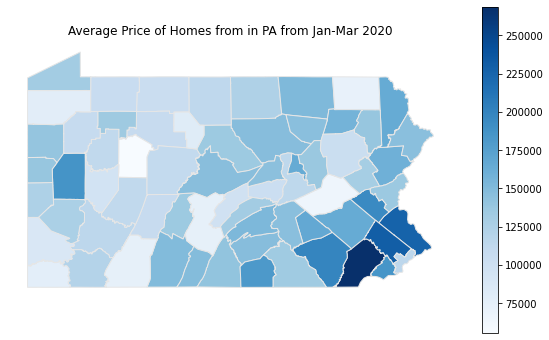

In [ ]:
merged.isnull().sum()
merged.fillna(0, inplace=True)

fig, ax = plt.subplots(1, figsize=(10,6))
merged.plot(column='average', cmap='Blues', linewidth=1, ax=ax, edgecolor='0.9', legend=True)
ax.axis('off')
plt.title("Average Price of Homes from in PA from Jan-Mar 2020")
plt.show()

In [ ]:
merged2 = df1.merge(df_2020_ALLHOMESpa2020_try, left_on = 'NAMELSAD', right_on = 'CountyName',how = 'outer')
merged2

,STATEFP,COUNTYFP,COUNTYNS,CNTYIDFP,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,geometry,2020-01,2020-02,2020-03,RegionID,SizeRank,average
0,42,031,01210234,42031,Clarion,Clarion County,06,H1,G4020,None,None,None,A,"POLYGON ((-79.20888 41.33186, -79.20888 41.331...",90561.935484,90822.161290,91041.709677,270352.935484,20557.032258,112667.154839
1,42,013,01213659,42013,Blair,Blair County,06,H1,G4020,None,11020,None,A,"POLYGON ((-78.11621 40.73938, -78.11680 40.738...",138952.291667,139798.083333,141370.041667,246030.708333,12814.000000,135793.025000
2,42,047,01213668,42047,Elk,Elk County,06,H1,G4020,None,41260,None,A,"POLYGON ((-78.41912 41.60219, -78.41896 41.589...",65364.400000,65519.900000,65607.700000,327420.400000,16830.000000,108148.480000
3,42,041,01209176,42041,Cumberland,Cumberland County,06,H1,G4020,276,25420,None,A,"POLYGON ((-76.85902 40.22633, -76.85900 40.226...",193247.368421,193786.342105,194503.105263,145789.526316,10981.052632,147661.478947
4,42,059,01214033,42059,Greene,Greene County,06,H1,G4020,None,None,None,A,"POLYGON ((-79.99801 39.98332, -79.99977 39.982...",108336.000000,108723.000000,108907.000000,35864.333333,20904.333333,76546.933333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,42,067,01209180,42067,Juniata,Juniata County,06,H1,G4020,None,None,None,A,"POLYGON ((-76.93975 40.63838, -76.94014 40.637...",150381.750000,150653.850000,150817.050000,193340.950000,19568.850000,132952.490000
63,42,103,01213683,42103,Pike,Pike County,06,H1,G4020,408,35620,35084,A,"POLYGON ((-74.99172 41.09228, -74.99182 41.092...",169186.272727,169804.545455,170961.181818,210416.090909,10690.818182,146211.781818
64,42,119,01213689,42119,Union,Union County,06,H1,G4020,526,30260,None,A,"POLYGON ((-76.89611 41.13907, -76.89625 41.138...",165641.250000,165976.416667,166284.166667,212534.416667,15324.583333,145152.166667
65,42,123,01213691,42123,Warren,Warren County,06,H1,G4020,None,47620,None,A,"POLYGON ((-78.91886 41.99812, -78.91885 41.997...",80768.458333,81052.000000,81392.333333,268250.750000,21440.208333,106580.750000


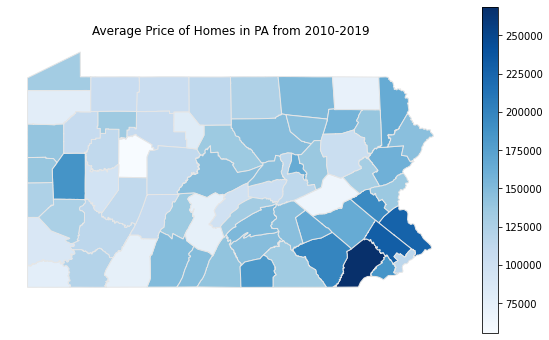

In [ ]:
merged2.isnull().sum()
merged2.fillna(0, inplace=True)

fig, ax = plt.subplots(1, figsize=(10,6))
merged2.plot(column='average', cmap='Blues', linewidth=1, ax=ax, edgecolor='0.9', legend=True)
ax.axis('off')
plt.title("Average Price of Homes in PA from 2010-2019")
plt.show()

In [ ]:
merged3 = df1.merge(df_2000_ALLHOMESpa2000_try, left_on = 'NAMELSAD', right_on = 'CountyName',how = 'outer')
merged3

,STATEFP,COUNTYFP,COUNTYNS,CNTYIDFP,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,geometry,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,...,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,RegionID,SizeRank,average
0,42,031,01210234,42031,Clarion,Clarion County,06,H1,G4020,None,None,None,A,"POLYGON ((-79.20888 41.33186, -79.20888 41.331...",73108.661529,73123.145400,73124.984110,73138.016368,73156.564755,73203.597013,73240.951852,73265.080884,73273.016368,73282.113142,73320.242175,73358.371207,73410.145400,73445.209916,73487.855078,73514.177658,73537.597013,73548.371207,73579.113142,73618.919594,73659.177658,73677.338949,73682.080884,73704.242175,73739.629271,73773.435723,...,74593.435723,74575.371207,74573.887336,74573.145400,74601.564755,74635.371207,74620.048626,74621.145400,74616.887336,74626.822820,74617.855078,74623.306691,74620.371207,75213.818787,75460.299853,75139.733871,75144.991935,75090.185484,75090.637097,75118.314516,75212.185484,75355.572581,75478.991935,75585.637097,75538.895161,75413.572581,75186.895161,75011.959677,74774.056452,74621.572581,74423.508065,74122.411290,73735.669355,73292.483871,72832.129032,72296.709677,71928.451613,270352.935484,20557.032258,75278.180563
1,42,013,01213659,42013,Blair,Blair County,06,H1,G4020,None,11020,None,A,"POLYGON ((-78.11621 40.73938, -78.11680 40.738...",95046.168239,95176.105739,95437.105739,95763.730739,96024.418239,96334.730739,96569.605739,96929.168239,97297.355739,97668.980739,98105.918239,98584.418239,99226.480739,99605.480739,99945.730739,100165.980739,100528.980739,100946.855739,101404.918239,101854.793239,102173.293239,102527.543239,102851.855739,103203.293239,103392.168239,103585.980739,...,122492.343750,122456.718750,122859.656250,123449.781250,123909.593750,124039.531250,124185.781250,124660.906250,125404.468750,126143.468750,126765.281250,126985.531250,127256.843750,127339.281250,126955.968750,126289.281250,125673.218750,126029.406250,126487.843750,127012.531250,126816.156250,126471.843750,126160.468750,126837.843750,127535.218750,127895.781250,127827.031250,128207.656250,128598.718750,128469.968750,128085.718750,127511.031250,127116.906250,126881.562500,126858.687500,126325.437500,126060.000000,246030.708333,12814.000000,115283.848367
2,42,047,01213668,42047,Elk,Elk County,06,H1,G4020,None,41260,None,A,"POLYGON ((-78.41912 41.60219, -78.41896 41.589...",59513.735297,59513.735297,59513.735297,59513.735297,59513.735297,59513.735297,59513.735297,59513.735297,59513.735297,59513.735297,59513.735297,59513.735297,59513.735297,59513.735297,59513.735297,59513.735297,59513.735297,59513.735297,59513.735297,59513.735297,59513.735297,59513.735297,59513.735297,59513.735297,59513.735297,59513.735297,...,61669.428571,61608.857143,61255.142857,60993.857143,60836.142857,60637.857143,60475.000000,60371.714286,60338.000000,60181.857143,60011.571429,59792.000000,59595.428571,59552.857143,59639.285714,59740.571429,59541.857143,59209.714286,58830.571429,58608.142857,58413.428571,58540.000000,58675.857143,58888.285714,58999.714286,59061.142857,59011.714286,58845.857143,58594.000000,58411.428571,58335.714286,58226.000000,58239.428571,57793.285714,57473.285714,57021.714286,56995.714286,327420.400000,16830.000000,106617.017745
3,42,041,01209176,42041,Cumberland,Cumberland County,06,H1,G4020,276,25420,None,A,"POLYGON ((-76.85902 40.22633, -76.85900 40.226...",113589.973684,114083.842105,114583.000000,115149.921053,115200.605263,115253.131579,115424.131579,115721.447368,116209.578947,116766.500000,117772.052632,118824.236842,119821.263158,120273.157895,120742.684211,

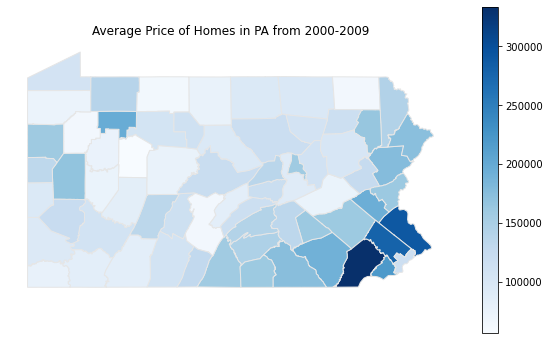

In [ ]:
merged3.isnull().sum()
merged3.fillna(0, inplace=True)

fig, ax = plt.subplots(1, figsize=(10,6))
merged3.plot(column='average', cmap='Blues', linewidth=1, ax=ax, edgecolor='0.9', legend=True)
ax.axis('off')
plt.title("Average Price of Homes in PA from 2000-2009")
plt.show()